In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## The cliff problem

In [24]:
n_rows = 4
n_cols = 12
reward_grid = -1 + np.zeros((n_rows,n_cols))
# Cliff
reward_grid[-1,1:-1] = -100

In [25]:
reward_grid

array([[  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,
          -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,
          -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.,
          -1.,   -1.,   -1.],
       [  -1., -100., -100., -100., -100., -100., -100., -100., -100.,
        -100., -100.,   -1.]])

In [46]:
action_dict = {'U':0, 'R':1, 'D':2, 'L':3}
inv_action = {v: k for k, v in action_dict.items()}

q0 = np.zeros((4,n_rows,n_cols))
eps = 0.15
gamma = 1
alpha = 0.5

In [42]:
start_state = (n_rows-1,0)
goal = (n_rows-1, n_cols-1)

def move_agent(agent, action):

    # get position of the agent
    (posX , posY) = agent
    
    # UP 
    if ((action == 0) and posX > 0):
        posX = posX - 1
    # RIGHT
    if((action == 1) and (posY < n_cols-1)):
        posY = posY + 1
    # DOWN
    if((action == 2) and (posX < n_rows-1)):
        posX = posX + 1
    # LEFT
    if((action == 3) and (posY > 0)):
        posY = posY - 1
    agent = (posX, posY)
    
    return agent

In [43]:
def epsilon_greedy_policy(state, q_table, epsilon = eps):
   
    # choose a random int from an uniform distribution [0.0, 1.0) 
    rand  = np.random.random()
    
    if(rand < epsilon):
        action = np.random.choice(4) 
    else:
        action = np.argmax(q_table[:, state[0], state[1]])
        
    return action

In [29]:
def in_cliff(state):
    return (0<state[1]<n_cols-1) & (state[0]==n_rows-1)

In [68]:
# Q Learning
n_episodes = 500
n_trials = 1000
def q_learning(n_episodes, n_trials, gamma, eps):

    list_sum_rewards_Q = np.zeros((n_trials,n_episodes))
    q_table_full = np.zeros((n_trials,4,n_rows,n_cols))

    for trial in range(n_trials):
        q_table = np.zeros((4,n_rows,n_cols))
        for episode in range(n_episodes):
            state = start_state
            terminal = False
            reward_sum = 0
            while not terminal:
                action = epsilon_greedy_policy(state,q_table,eps)
                new_state = move_agent(state,action)
                reward = reward_grid[new_state[0], new_state[1]]
                reward_sum+=reward
                q_table[action,state[0],state[1]]+= alpha * (reward + gamma * max(q_table[:,new_state[0],new_state[1]]) - q_table[action,state[0],state[1]])
                if new_state == goal:
                    terminal = True
                    list_sum_rewards_Q[trial,episode] = reward_sum
                if in_cliff(new_state):
                    state = start_state
                else:
                    state = new_state
        q_table_full[trial] = q_table
    return list_sum_rewards_Q, q_table_full

In [69]:
rewards_Q, q_table_Q = q_learning(500, 1000, gamma, eps)

In [72]:
def SARSA(n_episodes, n_trials, gamma, eps):
    list_sum_rewards_SARSA = np.zeros((n_trials,n_episodes))
    q_table_full = np.zeros((n_trials,4,n_rows,n_cols))

    for trial in range(n_trials):
        q_table = np.zeros((4,n_rows,n_cols))
        for episode in range(n_episodes):
            state = start_state
            terminal = False
            reward_sum = 0
            action = epsilon_greedy_policy(state,q_table,eps)
            while not terminal:
                new_state = move_agent(state,action)
                reward = reward_grid[new_state[0], new_state[1]]
                reward_sum+=reward
                new_action = epsilon_greedy_policy(new_state,q_table,eps)
                q_table[action,state[0],state[1]]+= alpha * (reward + gamma * q_table[new_action,new_state[0],new_state[1]] - q_table[action,state[0],state[1]])
                if new_state == goal:
                    terminal = True
                    list_sum_rewards_SARSA[trial,episode] = reward_sum
                action = new_action
                if in_cliff(new_state):
                    state = start_state
                else:
                    state = new_state
        q_table_full[trial] = q_table
    return list_sum_rewards_SARSA, q_table_full

In [73]:
rewards_SARSA, q_table_SARSA = SARSA(500, 1000, gamma, eps)

In [104]:
rewards_Q_001, q_table_Q_001 = q_learning(500, 1000, gamma, 0.01)
rewards_SARSA_001, q_table_SARSA_001 = SARSA(500, 1000, gamma, 0.01)

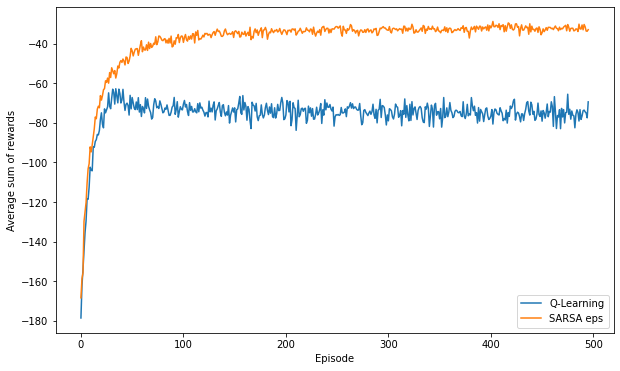

In [74]:
plt.figure(figsize=(10,6))
plt.plot(rewards_Q.mean(axis=0)[4:], label = 'Q-Learning')
plt.plot(rewards_SARSA.mean(axis=0)[4:], label = 'SARSA eps')
plt.xlabel('Episode')
plt.ylabel('Average sum of rewards')
plt.legend()
plt.show()

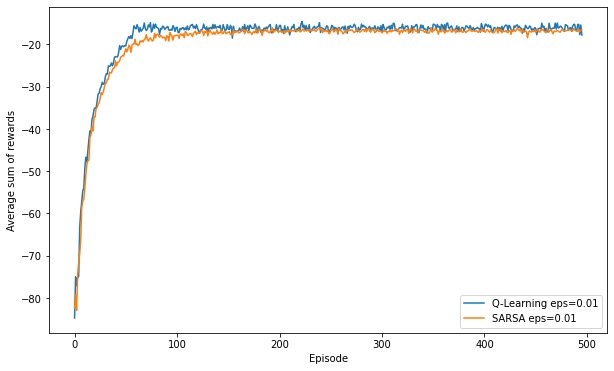

In [105]:
plt.figure(figsize=(10,6))
plt.plot(rewards_Q_001.mean(axis=0)[4:], label = 'Q-Learning eps=0.01')
plt.plot(rewards_SARSA_001.mean(axis=0)[4:], label = 'SARSA eps=0.01')
plt.xlabel('Episode')
plt.ylabel('Average sum of rewards')
plt.legend()
plt.show()

## Getting optimal policy

In [78]:
policy_sarsa = q_table_SARSA.mean(axis = 0).argmax(axis = 0)
policy_sarsa_arrows = [[inv_action[a] for a in row] for row in policy_sarsa]

policy_Q = q_table_Q.mean(axis = 0).argmax(axis = 0)
policy_Q_arrows = [[inv_action[a] for a in row] for row in policy_Q]

In [106]:
policy_sarsa_001 = q_table_SARSA_001.mean(axis = 0).argmax(axis = 0)
policy_sarsa_arrows_001 = [[inv_action[a] for a in row] for row in policy_sarsa_001]

policy_Q_001 = q_table_Q_001.mean(axis = 0).argmax(axis = 0)
policy_Q_arrows_001 = [[inv_action[a] for a in row] for row in policy_Q_001]

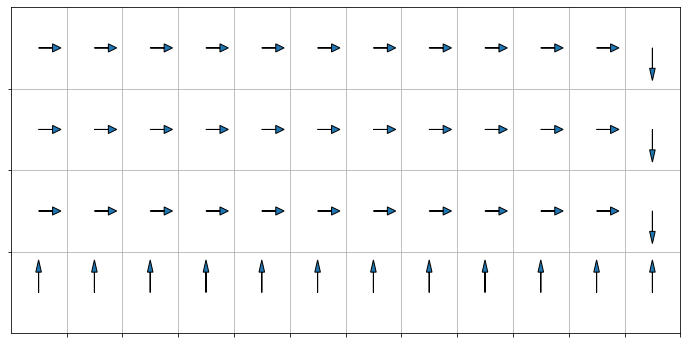

In [108]:
arrows = {"R":(1,0), "L":(-1,0),"U":(0,1),"D":(0,-1)}
scale = 0.25


fig, ax = plt.subplots(figsize=(12, 6))
ax.set_yticks([2.5,3.5,4.5])
ax.set_ylim(1.5,5.5)
ax.set_xlim(-0.5,11.5)

ax.set_xticks(np.arange(0.5,12.5,1))
for r, row in enumerate(policy_Q_arrows_001):
    for c, cell in enumerate(row):
        plt.arrow(c, 5-r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plt.grid()
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

##  TD learning with function approximation

In [111]:
states = np.arange(0,7)
P_A = np.zeros((7,7))
P_A[:,6] = 1
P_B = 1/6 + np.zeros((7,7))
P_B[:,6] = 0

p_a = 1/7
p_b = 6/7
gamma = 0.99
alpha = 0.01

w = np.array([1,1,1,1,1,1,10,1,1,1,1,1,1,1,1]).reshape((15,1))

phi_A = np.zeros((7,15))
phi_A[:,7] = 1
phi_A[6,7] = 2
phi_A[0:6,0:6] = 2*np.eye(6)
phi_A[6,6] = 1
phi_B = np.zeros((7,15))
phi_B[:,8:] = np.eye(7)

In [126]:
w = np.array([1,1,1,1,1,1,10,1,1,1,1,1,1,1,1], dtype = float)
q_A = phi_A.dot(w)
q_B = phi_B.dot(w)
action_map_Q = {'a': {'probs': P_A,
                    'phi': phi_A,
                    'q': q_A},
              'b': {'probs': P_B,
                    'phi': phi_B,
                    'q': q_B}}

In [127]:
n_trials = 1000
n_steps = 500
w_list_Q = np.zeros((n_trials,n_steps+1, 15))
visited_states_Q = np.zeros((n_trials,7))
for trial in range(n_trials):
# Initial State
    state = np.random.choice(states)
    w = np.array([1,1,1,1,1,1,10,1,1,1,1,1,1,1,1], dtype = float)#.reshape((15,1))
    w_list_Q[trial,0,:] = w
    for i in range(n_steps):
        # Policy
        visited_states_Q[trial,state]+=1
        action = np.random.choice(['a','b'], p = [1/7,6/7])
        new_state = np.random.choice(states, p = action_map_Q[action]['probs'][state])
        w = w + alpha * action_map_Q[action]['phi'][state,:]*(gamma * max(action_map_Q['a']['q'][new_state],action_map_Q['b']['q'][new_state]) - action_map_Q[action]['q'][state])
        w_list_Q[trial,i+1,:] = w
        action_map_Q['a']['q'] = phi_A.dot(w)
        action_map_Q['b']['q'] = phi_B.dot(w)
        state = new_state

In [128]:
w = np.array([1,1,1,1,1,1,10,1,1,1,1,1,1,1,1], dtype = float)
q_A = phi_A.dot(w)
q_B = phi_B.dot(w)
action_map_SARSA = {'a': {'probs': P_A,
                    'phi': phi_A,
                    'q': q_A},
              'b': {'probs': P_B,
                    'phi': phi_B,
                    'q': q_B}}

In [129]:
n_trials = 1000
n_steps = 500
w_list_SARSA = np.zeros((n_trials,n_steps+1, 15))
visited_states_sarsa = np.zeros((n_trials,7))

for trial in range(n_trials):
# Initial State
    state = np.random.choice(states)
    w = np.array([1,1,1,1,1,1,10,1,1,1,1,1,1,1,1], dtype = float)#.reshape((15,1))
    w_list_SARSA[trial,0,:] = w
    for i in range(n_steps):
        # Policy
        visited_states_sarsa[trial,state]+=1
        action = np.random.choice(['a','b'], p = [1/7,6/7])
        new_state = np.random.choice(states, p = action_map_SARSA[action]['probs'][state])
        new_action = np.random.choice(['a','b'], p = [1/7,6/7])
        w = w + alpha * action_map_SARSA[action]['phi'][state,:]*(gamma * action_map_SARSA[new_action]['q'][new_state] - action_map_SARSA[action]['q'][state])
        w_list_SARSA[trial,i+1,:] = w
        action_map_SARSA['a']['q'] = phi_A.dot(w)
        action_map_SARSA['b']['q'] = phi_B.dot(w)
        state = new_state

Text(0, 0.5, 'Estimate value of q(s,A)')

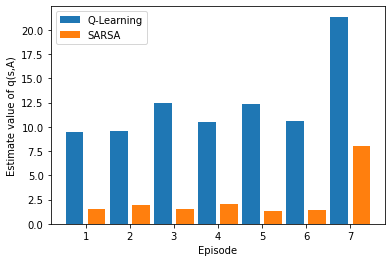

In [144]:
plt.bar(np.arange(1,8)-0.25,action_map_Q['a']['q'], width = 0.4, label = 'Q-Learning')
plt.bar(np.arange(1,8)+0.25,action_map_SARSA['a']['q'],width = 0.4, label = 'SARSA')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Estimate value of q(s,A)')

In [132]:
action_map_Q['b']['q']

array([4.42401959, 3.90243731, 3.66118644, 3.23055237, 4.34285565,
       3.81907192, 3.43820702])

In [133]:
action_map_SARSA['a']['q']

array([1.48996711, 1.94295597, 1.5122758 , 2.04686953, 1.30387764,
       1.4588418 , 7.99791532])

In [135]:
action_map_SARSA['b']['q']

array([1.0711356 , 1.05067187, 1.09584801, 1.14214287, 1.08834633,
       1.09060951, 1.13690555])

In [146]:
np.linalg.norm(phi_B)

2.6457513110645907

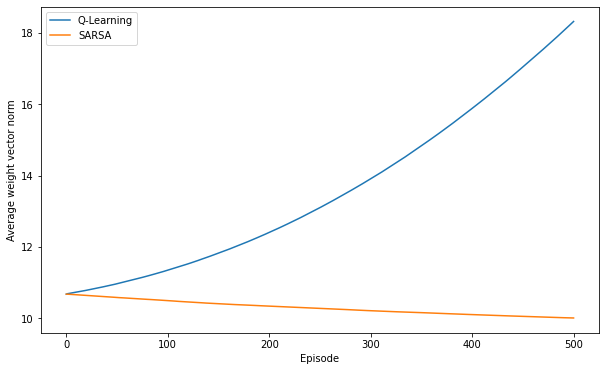

In [130]:
plt.figure(figsize=(10,6))

plt.plot(np.linalg.norm(w_list_Q,axis = 2).mean(axis = 0), label = 'Q-Learning')
plt.plot(np.linalg.norm(w_list_SARSA,axis = 2).mean(axis = 0), label = 'SARSA')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Average weight vector norm')
plt.show()

Text(0, 0.5, 'Average Number of Visits')

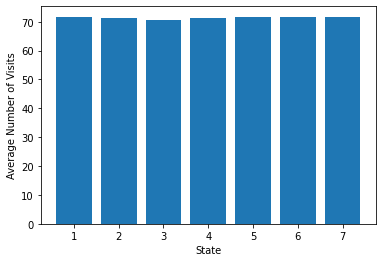

In [124]:
plt.bar(np.arange(1,8),visited_states_sarsa.mean(axis = 0))
plt.xlabel('State')
plt.ylabel('Average Number of Visits')